#                                               Customer Segmentation Analysis

#### Objective: To perform customer segmentation using unsupervised learning techniques on a retail dataset and provide insights for targeted marketing strategies.

#### Data: We will use the "Online Retail" dataset from the UCI Machine Learning Repository. 

## Importing the needed libraries and modules

In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

## Data Loading and Exploration

In [2]:

# Load the dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
df = pd.read_excel(url)


In [3]:
# Displaying the columns' data types 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [4]:
# Display the first five rows in the dataset
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


## Data Preprocessing

In [5]:
# Remove missing values and unnecessary columns
df_cleaned = df.dropna()
df_cleaned = df_cleaned[df_cleaned['Quantity'] > 0]

# Convert 'InvoiceDate' to datetime
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])



### Data exploration: Visualization

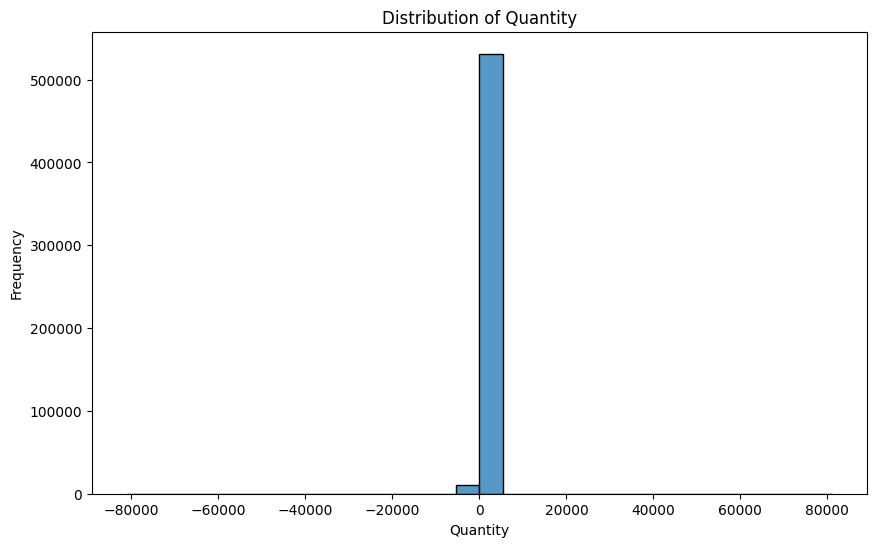

In [29]:
# Distribution of Quantity
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Quantity', bins=30)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

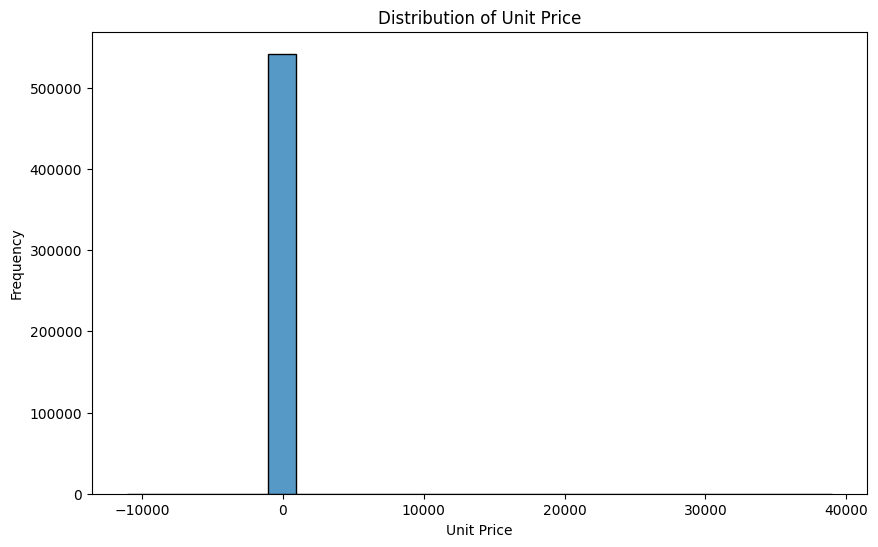

In [33]:
# Distribution of UnitPrice
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='UnitPrice', bins=25)
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

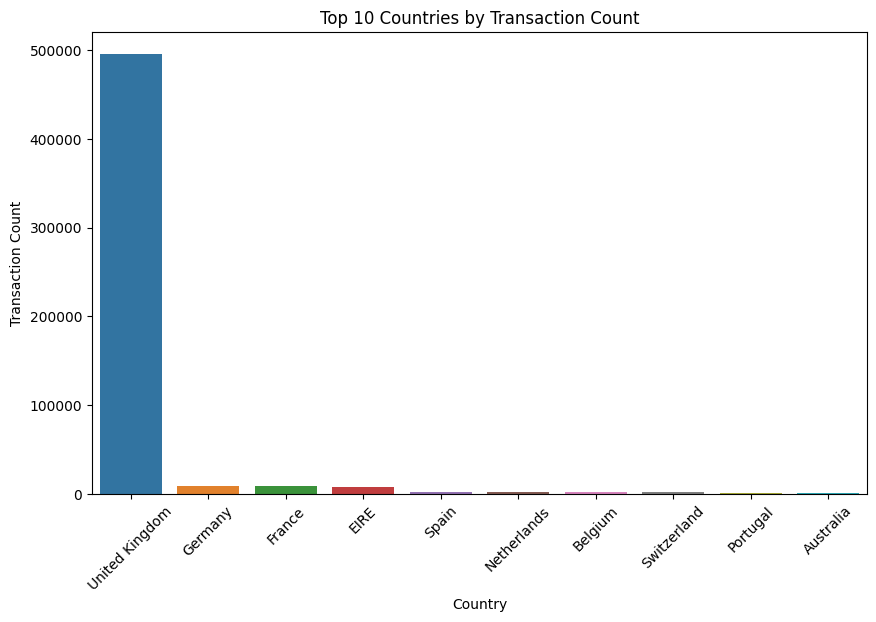

In [34]:
# Top 10 countries by transaction count
plt.figure(figsize=(10, 6))
top_countries = df['Country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries by Transaction Count')
plt.xlabel('Country')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.show()


##### Feature engineering


In [6]:
df_cleaned['TotalAmount'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

##### Encoding the categorical features


In [7]:
df_encoded = pd.get_dummies(df_cleaned, columns=['StockCode', 'Country'], drop_first=True)


##### Aggregating the data by CustomerID


In [8]:
agg_functions = {'TotalAmount': 'sum', 'InvoiceNo': 'nunique'}
df_grouped = df_encoded.groupby('CustomerID').agg(agg_functions).reset_index()

## Standardization and PCA

#### Separating the features and the target variable

In [10]:
X = df_grouped.drop(columns=['CustomerID'])

#### Standardizing the features **before** perfroming the PCA

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_scaled

array([[ 8.35963391e+00, -4.24674873e-01],
       [ 2.51046358e-01,  3.54080191e-01],
       [-2.85464504e-02, -3.52973410e-02],
       ...,
       [-2.08712435e-01, -2.94882363e-01],
       [ 4.57171586e-03,  1.52221279e+00],
       [-2.40912314e-02, -1.65089852e-01]])

#### Performing the PCA itself


In [15]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#### Creating a new DataFrame with reduced dimensions


In [16]:
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

In [17]:
df_pca.head()

,PC1,PC2
0,5.610863,-6.211444
1,0.427889,0.072856
2,-0.045144,-0.004774
3,-0.323599,-0.276982
4,-0.435571,-0.165010


## K-Means Clustering

#### Determining the optimal number of clusters using the Elbow method

In [20]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\youss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\youss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\youss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

In [24]:
inertia

[8677.999999999998,
 4694.312200892966,
 3262.3345770466503,
 2287.575468335628,
 1626.569727923783,
 1281.5927116218913,
 1035.5705876265513,
 847.5037473433551,
 715.3169732816575,
 613.0814750543122]

#### Plotting the Elbow curve

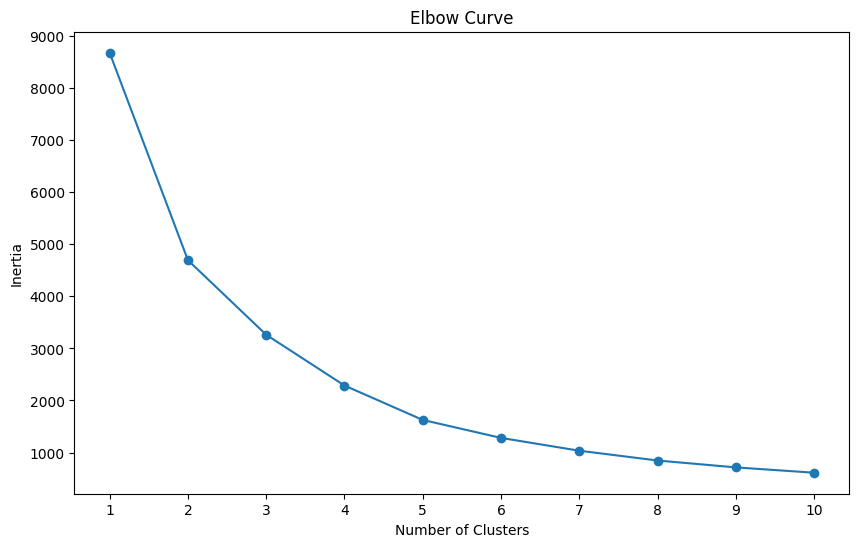

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()

We can see from the elbow curve that the optimum number of clusters is five clusters

#### Performing the K-Means clustering

In [26]:
num_clusters = 5 
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_pca['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\youss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Visualizing the clusters done

 #### Visualizing the clusters using a scatter plot

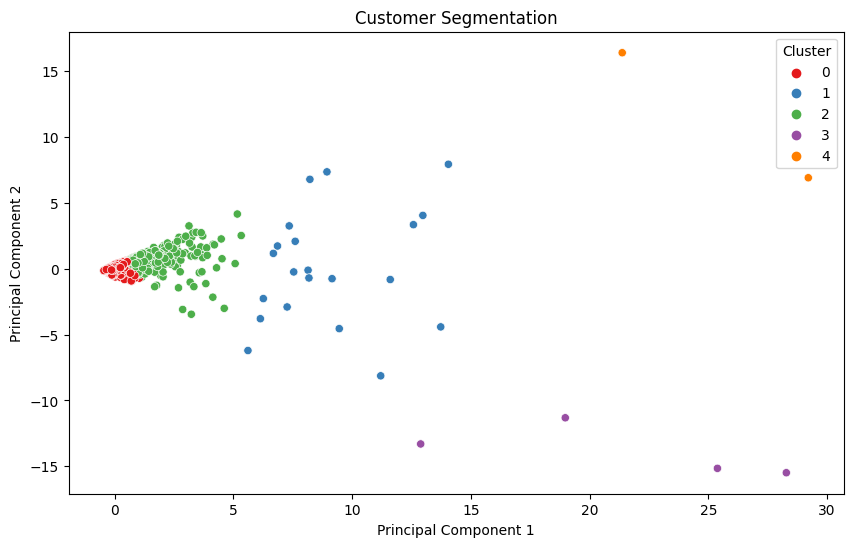

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='Set1')
plt.title('Customer Segmentation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Key Findings and Insights

**Customer Segmentation:** The clustering analysis revealed distinct customer segments based on purchasing behavior. Each segment represents a different type of customer, such as high spenders, occasional shoppers, and low-value customers.

**Geographical Variation:** Different customer segments could be more prevalent in certain countries(The United Kingdom in our example). Tailoring marketing strategies to specific regions might yield better results.

**High-Value Customers:** One cluster might represent high-value customers who make frequent purchases and contribute significantly to the overall revenue. This segment could be targeted for loyalty programs to enhance customer retention.

## Next Steps

**Fine-Tuning Clustering Algorithms:** Experimenting with different clustering algorithms beyond K-Means, such as hierarchical clustering or DBSCAN would be a good idea as well as comparing their performance and seeing if different algorithms yield more meaningful clusters than the ones we already have